# Problem Statement

#### As a data scientist of a leading decision analysis firm you are required to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch.

# Dataset Details

#### Name - Game name
#### Platform - Running platform
#### Year of release
#### Genre - Game Genre
#### Publisher
#### Critic_score - Aggregate score compiled by Metacritic staff
#### Criticcount - The number of critics used in coming up with the Critic Score
#### User_score - Score by Metacritic’s subscribers
#### Usercount - Number of users who gave the user score
#### Developer - Party responsible for creating the game
#### Rating - The ESRB ratings
#### NA_Sales - Sales in North America (in millions of units)
#### EU_Sales - Sales in the European Union (in millions of units)
#### JP_Sales - Sales in Japan (in millions of units)
#### Global_Sales - Total sales in the world (in millions of units)

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN

# Loading the training dataset

In [2]:
df=pd.read_csv("Train.csv")

In [3]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


# Loading the testing dataset

In [4]:
df1=pd.read_csv("test.csv")

In [5]:
df1

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,Theresia...,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.0,61.0,6.0,8,8.0,WorkJam,M
2139,Sacred 2: Fallen Angel,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.0,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,Dance Sensation!,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2141,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,Little Orbit,0.00,0.05,0.0,58.0,5.0,7.5,4.0,WayForward,E10+


# Understanding the data

In [6]:
df.shape

(14576, 15)

In [7]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [8]:
df.tail(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14575,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [9]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

#### The 'User_Count' column's datatype is in object so we will be converting it to float64

In [10]:
df["User_Score"].replace({"tbd": "0"}, inplace=True)
df['User_Score'] = df.User_Score.astype(float)
df1["User_Score"].replace({"tbd": "0"}, inplace=True)
df1['User_Score'] = df1.User_Score.astype(float)

In [11]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   float64
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(9), object(6)
memory usage: 1.7+ MB


In [13]:
df.describe(include="all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
count,14574,14576,14344.000000,14574,14527,14576.000000,14576.000000,14576.000000,7217.000000,7217.000000,8760.000000,6796.000000,8829,8704,14576.000000
unique,10327,31,NaN,12,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1577,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E,NaN
freq,11,1935,NaN,2974,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171,3460,NaN
mean,NaN,NaN,2006.437117,NaN,NaN,0.295577,0.163957,0.085659,69.676043,27.312041,5.549007,172.513096,NaN,NaN,0.598972
std,NaN,NaN,5.955664,NaN,NaN,0.866491,0.536354,0.329646,13.773391,19.464196,3.255432,576.609716,NaN,NaN,1.647699
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000,NaN,NaN,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,61.000000,12.000000,3.600000,11.000000,NaN,NaN,0.050000
50%,NaN,NaN,2007.000000,NaN,NaN,0.100000,0.030000,0.000000,71.000000,22.000000,7.000000,27.000000,NaN,NaN,0.220000
75%,NaN,NaN,2010.000000,NaN,NaN,0.280000,0.130000,0.030000,80.000000,38.000000,8.000000,89.000000,NaN,NaN,0.550000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>],
       [<AxesSubplot:title={'center':'User_Score'}>,
        <AxesSubplot:title={'center':'User_Count'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>]], dtype=object)

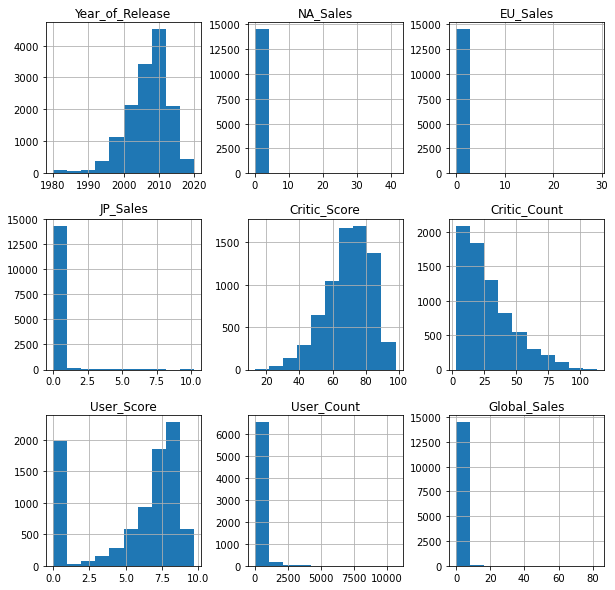

In [14]:
df.hist(figsize=(10,10))

non_floats = []
for col in df:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df_hist = df.drop(columns=non_floats)

#### Correlation

In [15]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
Year_of_Release,1.000000,-0.095694,0.006251,-0.176831,0.011131,0.236285,-0.073614,0.183643,-0.078659
NA_Sales,-0.095694,1.000000,0.763139,0.446972,0.243265,0.291196,0.154732,0.249261,0.940451
EU_Sales,0.006251,0.763139,1.000000,0.432235,0.221334,0.273103,0.143408,0.286614,0.900325
JP_Sales,-0.176831,0.446972,0.432235,1.000000,0.153130,0.176971,0.144683,0.074393,0.610518
Critic_Score,0.011131,0.243265,0.221334,0.153130,1.000000,0.427287,0.473804,0.268991,0.247418
Critic_Count,0.236285,0.291196,0.273103,0.176971,0.427287,1.000000,0.363588,0.372011,0.299253
User_Score,-0.073614,0.154732,0.143408,0.144683,0.473804,0.363588,1.000000,0.020687,0.165938
User_Count,0.183643,0.249261,0.286614,0.074393,0.268991,0.372011,0.020687,1.000000,0.268000
Global_Sales,-0.078659,0.940451,0.900325,0.610518,0.247418,0.299253,0.165938,0.268000,1.000000


#### Correlation Heatmap

<AxesSubplot:>

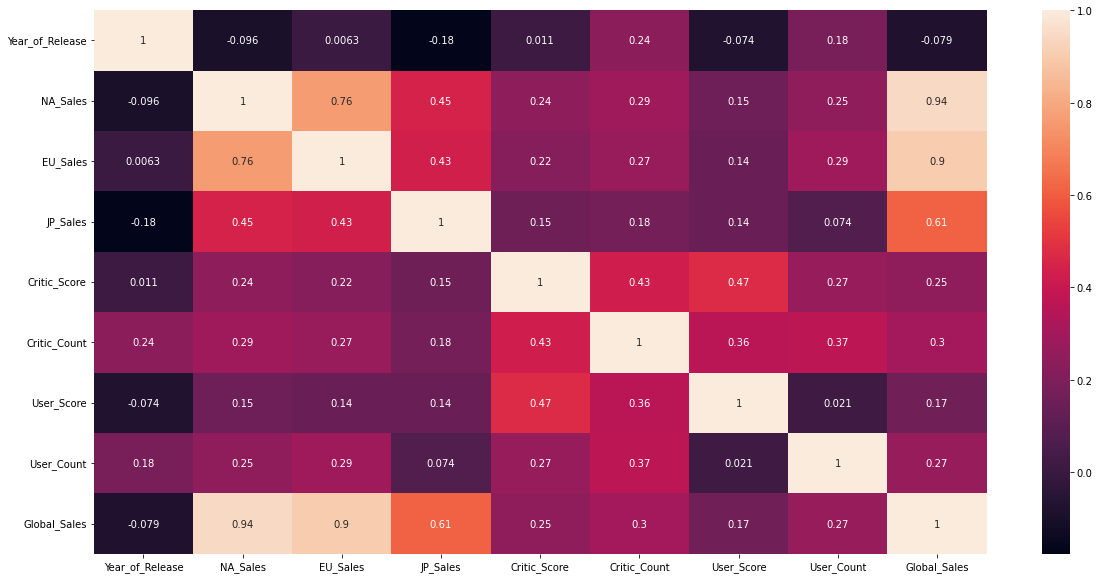

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True)

# Data Preparation

### Checking for missing values

In [17]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

#### There are missing values which we will be treating later using KNN imputer

##### We will take a copy of the original training and testing datasets

In [18]:
df_train=df.copy()
df_test=df1.copy()

### We will be dropping the following columns 
#### 'Name'- It contains more than 10000 unique values so the process of encoding will increase the dimensionality drastically    (Categorical)
#### 'Developer'- There are missing values which can be treated using mode but all missing developers will be replaced by only one developers which will not make any sense (Categorical)
#### 

In [19]:
df_train.drop(['Name','Developer'],axis=1,inplace=True)
df_test.drop(['Name','Developer'],axis=1,inplace=True)

#### Inorder to encode the categorical varibles we will combining both the training and testing datasets because if they are encoded seperately there will be mismatch in columns when they are passed to the model

In [20]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)

In [21]:
df_combined

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8.0,322.0,E,82.53
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,40.24
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E,35.52
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8.0,192.0,E,32.77
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.00,61.0,6.0,8.0,8.0,M,NaN
16715,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.00,71.0,41.0,6.9,203.0,M,NaN
16716,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16717,X360,2014.0,Action,Little Orbit,0.00,0.05,0.00,58.0,5.0,7.5,4.0,E10+,NaN


#### Encoding using one hot encoding 

In [22]:
df_combined=pd.get_dummies(df_combined, columns = ['Platform','Publisher','Genre','Rating'])

In [23]:
df_combined

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform_2600,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,0,...,1,0,0,1,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,0,...,0,0,0,1,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,0,...,1,0,0,1,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,8.0,NaN,0,...,0,0,0,0,0,0,0,1,0,0
16715,2008.0,0.00,0.05,0.00,71.0,41.0,6.9,203.0,NaN,0,...,0,0,0,0,0,0,0,1,0,0
16716,2010.0,0.06,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
16717,2014.0,0.00,0.05,0.00,58.0,5.0,7.5,4.0,NaN,0,...,0,0,0,0,1,0,0,0,0,0


#### After encoding we will split the combined dataset back to training and testing datasets

In [24]:
train = pd.DataFrame(df_combined.iloc[:14576,:])

In [25]:
train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform_2600,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,0,...,1,0,0,1,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,0,...,0,0,0,1,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,0,...,1,0,0,1,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,0,...,0,0,0,0,0,0,0,0,0,0
14572,2006.0,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01,0,...,1,0,0,0,0,0,0,0,0,0
14573,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,0,...,0,0,0,0,0,0,0,0,0,0
14574,2003.0,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01,0,...,0,0,0,0,0,0,0,0,0,0


#### Because we combined both datasets , we will droping 'Global_Sales' from the testing data as it is not required

In [26]:
test = pd.DataFrame(df_combined.iloc[14576:,:])
test=test.reset_index()
test.drop(['Global_Sales'],axis=1,inplace=True)
test.drop(['index'],axis=1,inplace=True)

In [27]:
test

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_2600,Platform_3DO,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2011.0,0.12,0.00,0.0,NaN,NaN,7.6,7.0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2005.0,0.07,0.05,0.0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,0.12,0.00,0.0,NaN,NaN,0.0,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2008.0,0.11,0.01,0.0,49.0,22.0,7.1,7.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2009.0,0.12,0.00,0.0,NaN,NaN,0.0,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2008.0,0.05,0.00,0.0,61.0,6.0,8.0,8.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2139,2008.0,0.00,0.05,0.0,71.0,41.0,6.9,203.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2140,2010.0,0.06,0.00,0.0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2141,2014.0,0.00,0.05,0.0,58.0,5.0,7.5,4.0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Treating the missing values using KNN imputer

In [31]:
from sklearn.impute import KNNImputer

#### For using knn imputer we will need an optimised 'K' value

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [29]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 1):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=train.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

#### The optimised k value with lowest error

In [32]:
k_errors = optimize_k(data=train, target='Global_Sales')

In [33]:
k_errors

[{'K': 1, 'RMSE': 0.27257657345113784},
 {'K': 2, 'RMSE': 0.28024851886923574},
 {'K': 3, 'RMSE': 0.29569561706575415},
 {'K': 4, 'RMSE': 0.2984774466255539},
 {'K': 5, 'RMSE': 0.29977969388705256},
 {'K': 6, 'RMSE': 0.28261541430581916},
 {'K': 7, 'RMSE': 0.2778317975082653},
 {'K': 8, 'RMSE': 0.2845870050000911},
 {'K': 9, 'RMSE': 0.30170394044707277},
 {'K': 10, 'RMSE': 0.28482659153167955},
 {'K': 11, 'RMSE': 0.2821032511880909},
 {'K': 12, 'RMSE': 0.31780389224317507},
 {'K': 13, 'RMSE': 0.2888611450854033},
 {'K': 14, 'RMSE': 0.33557753413242286},
 {'K': 15, 'RMSE': 0.2855122086980219},
 {'K': 16, 'RMSE': 0.32620934533249757},
 {'K': 17, 'RMSE': 0.26481229328352773},
 {'K': 18, 'RMSE': 0.28420152367659735},
 {'K': 19, 'RMSE': 0.3177173849403664}]

#### From k_errors we can say k=17 is the optimised value as it has the lowest error

#### Replacing the missing values with KNN imputer

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(train)
df_imputed = pd.DataFrame(imputed, columns=train.columns)

In [44]:
df_imputed.isnull().sum()

Year_of_Release    0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
                  ..
Rating_EC          0
Rating_K-A         0
Rating_M           0
Rating_RP          0
Rating_T           0
Length: 640, dtype: int64

##### All missing values have been treated

#### Replacing the missing values in test dataset also

In [112]:
imputer1 = KNNImputer(n_neighbors=17)
imputed1 = imputer1.fit_transform(test)
df_imputed1 = pd.DataFrame(imputed1, columns=test.columns)

### Normalising the data

In [79]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = preprocessing.normalize(df_imputed)

In [80]:
norm=pd.DataFrame(x_scaled)

In [81]:
norm.columns=df_imputed.columns

In [82]:
norm

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform_2600,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0.985236,0.020314,0.014224,0.001852,0.037327,0.025048,0.003929,0.158149,0.040534,0.0,...,0.000491,0.0,0.0,0.000491,0.0,0.0,0.0,0.0,0.0,0.0
1,0.972912,0.014253,0.001755,0.003338,0.041142,0.028514,0.003875,0.224308,0.019723,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.941514,0.007352,0.005983,0.001777,0.038448,0.034228,0.003892,0.332437,0.016655,0.0,...,0.000000,0.0,0.0,0.000469,0.0,0.0,0.0,0.0,0.0,0.0
3,0.993850,0.007722,0.005407,0.001623,0.039576,0.036113,0.003958,0.094982,0.016211,0.0,...,0.000495,0.0,0.0,0.000495,0.0,0.0,0.0,0.0,0.0,0.0
4,0.955454,0.005395,0.004256,0.004892,0.040463,0.026750,0.003838,0.290590,0.015016,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,0.999128,0.000000,0.000000,0.000005,0.032272,0.015014,0.002137,0.021719,0.000005,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14572,0.999022,0.000000,0.000005,0.000000,0.034627,0.018515,0.003205,0.020038,0.000005,0.0,...,0.000498,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14573,0.997549,0.000000,0.000000,0.000005,0.034986,0.006636,0.002838,0.060164,0.000005,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
14574,0.999424,0.000005,0.000000,0.000000,0.031552,0.007279,0.002081,0.009921,0.000005,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visualisation

### 1.Top 5 platforms based on global sales

In [136]:
a=df.groupby('Platform')['Global_Sales'].sum()
a=pd.DataFrame(data=a)
a=a.reset_index()

In [138]:
top=a.sort_values(by=['Global_Sales'],ascending=False).head(5)

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

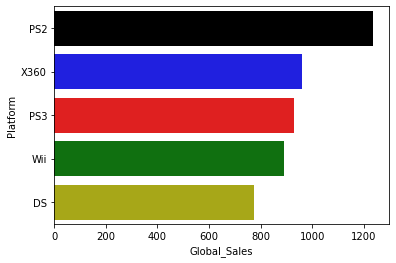

In [139]:
sns.barplot(x="Global_Sales", y="Platform", data=top , color="r",ci = 95,orient='h',palette=["k", "b", "r","g","y"])

### 2.Year vs Global sales

In [140]:
b=df.groupby('Year_of_Release')['Global_Sales'].sum()
b=pd.DataFrame(data=b)
b=b.reset_index()

In [142]:
top=b.sort_values(by=['Global_Sales'],ascending=False).head(5)

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

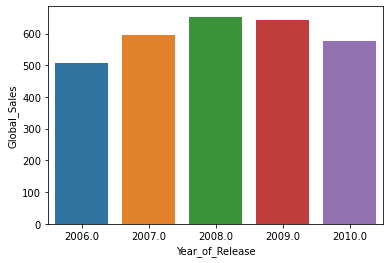

In [146]:
sns.barplot(x="Year_of_Release", y="Global_Sales", data=top ,ci = 95)

### 3.Genre vs Global sales

In [147]:
c=df.groupby('Genre')['Global_Sales'].sum()
c=pd.DataFrame(data=c)
c=c.reset_index()

In [148]:
top=c.sort_values(by=['Global_Sales'],ascending=False).head(5)

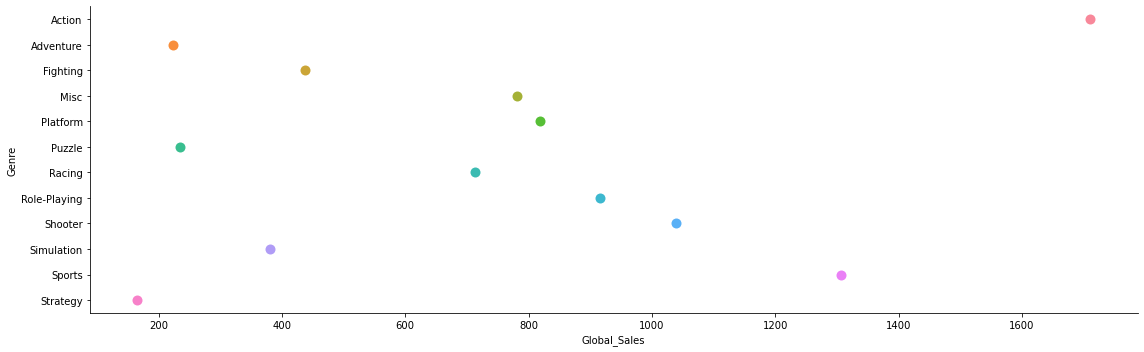

In [152]:
sns.catplot(x="Global_Sales", y="Genre",kind="swarm", data=c,aspect=3.2,s=10)

# Creating Models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

### Splitting the data

In [93]:
X = df_imputed.drop('Global_Sales', axis=1)
y = df_imputed['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 1.Random Forest algorithm

In [94]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [104]:
model.score(X_train, y_train)*100

98.32489523976331

In [105]:
model.score(X_test, y_test)*100

95.60824341387556

In [122]:
y_pred = model.predict(X_test)
rmse(y_pred,y_test)

0.29596179857500526

##### Train Score: 98.32489523976331 %

##### Test Score: 95.60824341387556 %
##### RMSE: 0.29596179857500526


### 2.Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [106]:
model1.score(X_train,y_train)*100

99.43299853161407

In [107]:
model1.score(X_test,y_test)*100

99.11032906186963

In [123]:
y_pred = model1.predict(X_test)
rmse(y_pred,y_test)

0.13320828266089804

##### Train Score: 99.43299853161407 %
##### Test Score: 99.11032906186963 %
##### RMSE: 0.13320828266089804



### 3.Decission Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor
dTree=DecisionTreeRegressor(criterion="mse",random_state=0,max_depth=15)
dTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=0)

In [108]:
dTree.score(X_train,y_train)*100

99.99387742954703

In [109]:
dTree.score(X_test,y_test)*100

92.38677817937084

In [125]:
y_pred = dTree.predict(X_test)
rmse(y_pred,y_test)

0.3896734073859424

##### Train Score: 99.99387742954703 %
##### Test Score: 92.38677817937084 %
##### RMSE: 0.3896734073859424

## Out of these three models linear regression gives the best accuracy score and has the least error so we will be using linear regression for predicting the test dataset

# Final Score

### TRAIN SCORE: 99.43299853161407 %
### TEST SCORE: 99.11032906186963 %
### RMSE: 0.13320828266089804

### Predicitng the testing dataset

In [113]:
model1.predict(df_imputed1)

array([0.14782108, 0.18121762, 0.13878983, ..., 0.063434  , 0.03270428,
       0.06793716])

In [114]:
predicted=pd.DataFrame(model1.predict(df_imputed1))
predicted.columns=['Global_Sales']

In [117]:
predicted

,Global_Sales
0,0.147821
1,0.181218
2,0.138790
3,0.128009
4,0.115066
...,...
2138,0.051192
2139,0.053377
2140,0.063434
2141,0.032704


In [118]:
output = pd.concat([df1.Name, predicted], join = 'outer', axis = 1)

In [130]:
output.columns=['Name','Global sales']

In [131]:
output

,Name,Global sales
0,Nicktoons: MLB,0.147821
1,Shonen Jump's One Piece: Grand Battle,0.181218
2,Learn Math,0.138790
3,Nitrobike,0.128009
4,Cruise Ship Vacation Games,0.115066
...,...,...
2138,Theresia...,0.051192
2139,Sacred 2: Fallen Angel,0.053377
2140,Dance Sensation!,0.063434
2141,Adventure Time: The Secret of the Nameless Kin...,0.032704


In [133]:
output.to_csv('output.csv', encoding='utf-8',index=False)